In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [7]:
data = pd.read_csv('data/df_sentiment.csv')

In [8]:
sentiment_features = data[['sentiment_positive', 'sentiment_negative', 'sentiment_compound']]


In [21]:
# Standardize the features
# scaler = StandardScaler()
# sentiment_scaled = scaler.fit_transform(sentiment_features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(2, 25)  # Test between 2 and 10 clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(sentiment_features)
    inertia.append(kmeans.inertia_)

/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

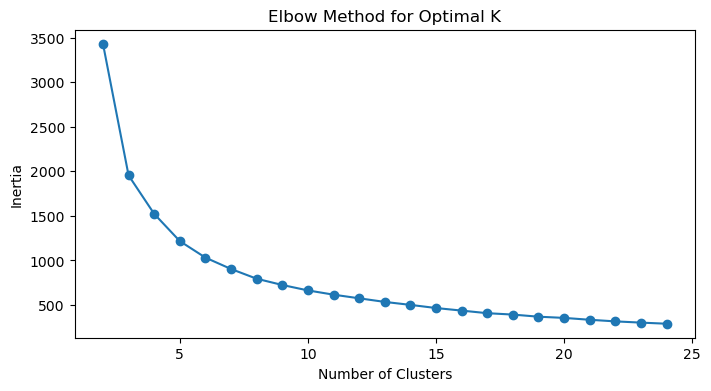

In [12]:
# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [22]:
optimal_k = 18

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(sentiment_features)

silhouette_avg = silhouette_score(sentiment_features, data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4590968346215152


/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/soline/micromamba/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

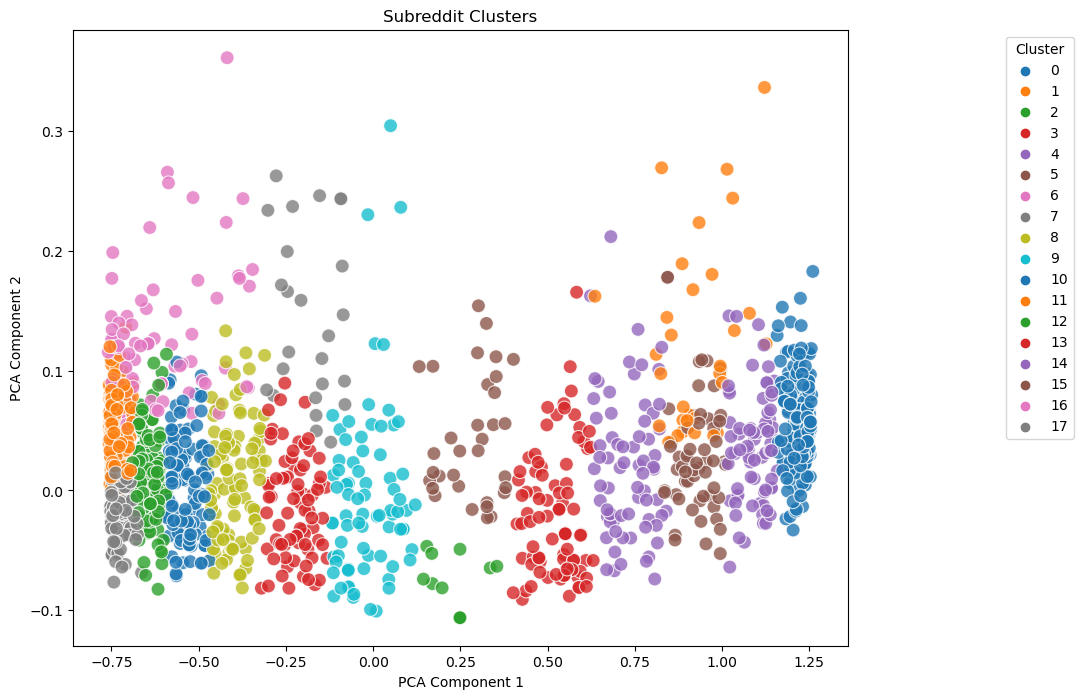

In [29]:
import seaborn as sns
pca_2d = PCA(n_components=2).fit_transform(sentiment_features)

data['PCA1'] = pca_2d[:, 0]
data['PCA2'] = pca_2d[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='cluster', palette='tab10', data=data, s=100,alpha=0.8
)
plt.title("Subreddit Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjusting legend position
plt.show()

In [30]:
for cluster_id in range(18):
    subreddits = data[data['cluster'] == cluster_id]['SOURCE_SUBREDDIT']
    print(f"Cluster {cluster_id}: {list(subreddits)}")


Cluster 0: ['metaconservative', 'libertarian', 'altnewz', 'mensrights', 'socialism', 'socialism', 'socialism', 'socialism', 'worldpolitics', 'badpolitics', 'mensrights', 'libertariancopypasta', 'libertariancopypasta', 'gunpolitics', 'metanarchism', 'libertariancopypasta', 'rconservativenews', 'rconservativenews', 'libertarian', 'censorship', 'censorship', 'libertariancopypasta', 'libertariancopypasta', 'libertariancopypasta', 'libertariancopypasta', 'shitrconservativesays', 'politicaldiscussion', 'worldpolitics', 'politicalmoderation', 'socialists', 'censorship', 'libertarian', 'askaconservative', 'libertariancopypasta', 'conservativemeta', 'shitrconservativesays', 'mensrights', 'shitrconservativesays', 'shitrconservativesays', 'socialism', 'communism', 'shitpoliticssays', 'ukipparty', 'againstmensrights', 'metanarchism', 'metanarchism', 'metanarchism', 'shitrconservativesays', 'law', 'badukpolitics', 'mensrights', 'libertariancopypasta', 'shitrconservativesays', 'badukpolitics', 'miss

In [36]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Compute alignment metrics
ari = adjusted_rand_score(data['SOURCE_COMMUNITY'], data['cluster'])
nmi = normalized_mutual_info_score(data['SOURCE_COMMUNITY'], data['cluster'])

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)


Adjusted Rand Index (ARI): 0.07645326859121546
Normalized Mutual Information (NMI): 0.09239852102113304
